#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 19D070048
4. Write your names here:Puranjay Datta 
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [52]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    Y=np.zeros(np.shape(X))
    if X.ndim==1 :
      Y = (X-np.mean(X))/np.std(X)  #Handling 1D array
    else :
      
      for col in range(0,len(X[0])):
        Y[:,col] = (X[:,col]-np.mean(X[:,col]))/np.std(X[:,col])  # normalized matrix
        
    return Y
    raise NotImplementedError()

In [53]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [54]:
def Prediction (X, w): # Output should be a prediction vector y
    r=len(X)
    X=np.c_[ X, np.ones(r)];  #Adding a column of 1's
    return np.dot(X,w)
    raise NotImplementedError()


In [55]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [56]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    return np.mean(np.square(Prediction(X, w)-t))   #MSE=(x1^2+x2^2+...xn^2)/n
    raise NotImplementedError()

In [57]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [58]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
    return np.mean(np.abs(Prediction(X, w)-t))  #MAE=(|x1|+|x2|+...|xn|)/n
    raise NotImplementedError()

In [59]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [60]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    return  MSE_Loss(X,t,w)+lamda*np.linalg.norm(w[0:len(w)-1],ord=2)  #L2_Loss=MSE+ lamda*(w1^2+w2^2+...wn^2)^0.5
    raise NotImplementedError()

In [61]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [62]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    return MSE_Loss(X,t,w)+lamda*np.linalg.norm(w[0:len(w)-1],ord=1) #L1_Loss=MSE+lamda*(|w1|+|w2|+...|wn|)
    raise NotImplementedError()

In [63]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [64]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    return np.sqrt(MSE_Loss(X,t,w))/np.std(t);
    raise NotImplementedError()

In [65]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [66]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    grad=np.zeros(len(w));#initialize 
    r=len(X)  #no. of rows of dataset
    X_new=np.c_[ X, np.ones(r)];  #Adding the bias
    for i in range(0,len(w)):
        grad[i]=(-2/len(X_new))*np.dot((t-Prediction(X,w)),X_new[:,i]) #(-2/n)sum[(ti-wi.xi)xi]
    return grad
    raise NotImplementedError()

In [67]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [68]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    grad=np.zeros(len(w));#initialize 
    r=len(X)   #no. of rows of dataset
    X_new=np.c_[ X, np.ones(r)]; #Adding the bias
    for i in range(0,len(w)):
        grad[i]=(-1/len(X_new))*np.dot(np.sign((t-Prediction(X,w))),X_new[:,i])#(-1/n)sum[sign{(ti-wi.xi)}xi]
    return grad
    raise NotImplementedError()

In [69]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [70]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    grad=np.zeros(len(w)); #initialize
    for i in range(0,len(w)-1):
      grad[i]=(lamda*w[i]/np.linalg.norm(w[0:len(w)-1],ord=2))  #MSE gradient + sum[lamda*wi/Norm_without_bias]
    
    return grad+MSE_Gradient(X,t,w)
    raise NotImplementedError()

In [71]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [72]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    grad=np.zeros(len(w));#initialize
    for i in range(0,len(w)-1):
        grad[i]=(lamda*np.sign(w[i]))  #MSE gradient + sum[lamda*sign(wi)]
        
    return grad+MSE_Gradient(X,t,w)
    raise NotImplementedError()

In [73]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [74]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    previous_loss = None
    current_loss=None
  
    for i in range(0,max_iter):
             
        # Calculationg the current cost
        current_loss = lossfunc(X,t,w,lamda)
        #Calculating gradient
        grad_w=gradfunc(X,t,w,lamda)
        #Calculating the updated weights
        w=w-lr*grad_w
        if previous_loss and abs(previous_loss-current_loss)<epsilon:  # if difference between current and previous error is less than eps then stop iteration
            break
         
        previous_loss = current_loss
        
    
    train_loss_final=lossfunc(X,t,w,lamda)
    validation_loss_final=lossfunc(X_val,t_val,w,lamda)
    validation_NRMSE=NRMSE_Metric(X_val,t_val,w)
    return w, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this
    

In [75]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient) 
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [76]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    r=len(X)
    X_new=np.c_[ X, np.ones(r)];
    I=np.identity(len(X_new[0])) #Identity Matrix
    X_t=np.transpose(X_new) #Xtranspose=X'
    w=np.dot(np.dot(np.linalg.inv((np.dot(X_t,X_new)+lamda*I)),X_t),t) #(X' X + lambda I)^(-1) X' t
    return w
    raise NotImplementedError()

In [77]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#... Part 1 ends Below this you be more creative. Just comment out the lines where you save files (e.g. test predictions).

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


In [78]:
#Reading the Training dataframe
url="https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv "
df=pd.read_csv(url)

#For splitting training & validation dataset in 80:20 ratio
row=np.int(len(df)*0.8)

#Extracting the features for training 
train_df=df[df.columns.values[0:21]].iloc[:row,:]

#Extracting the target for training dataframe 
t=np.array(df[df.columns.values[21]].iloc[:row])

#Normalizing & adding bias
#X=Normalize(np.asarray(train_df))
X=np.asarray(train_df)
X=np.c_[ X, np.ones(len(X))]

#initialize with array of 1's for gradient descent
w=np.ones(len(X[0])+1)*0.1

#Extracting Validation dataframe
validation_df=df[df.columns.values[0:21]].iloc[row+1:,:]

#Extracting the target for validation dataframe 
t_val=np.array(df[df.columns.values[21]].iloc[row+1:])

#Normalizing & adding bias
X_val=np.asarray(validation_df)
X_val=np.c_[ X_val, np.ones(len(X_val))];




In [79]:
#1-(sum of squares of residual errors/sum of squares of error) 
def r2score(y,f):
  s1=np.sum(np.square(y-f));
  s2=np.sum(np.square(np.mean(y)-y))
  return (1-1.0*s1/s2)



# **MSE+lamda(L2)**

In [80]:
result=[];
#Lamda values for regularization
lamda=np.array([0.01,0.1,1,10,100,1000,10000,100000])
for l in lamda:
  result.append(Gradient_Descent (X, X_val, t, t_val, w, l, 1000, 1e-10, 1e-8, L2_Loss,L2_Gradient))
  #return w, train_loss_final, validation_loss_final, validation_NRMSE


In [81]:
ans1=np.array(result)
train_rmse=[];validation_rmse=[];
#Training and validation rmse calculations
for i in range(len(result)):
  train_rmse.append(np.sqrt(MSE_Loss(X,t,ans1[i][0])))
  validation_rmse.append(np.sqrt(MSE_Loss(X_val,t_val,ans1[i][0])))
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


# **First approximately plot the lamda vs rmse error then increase iterations to find the weights more accurately**

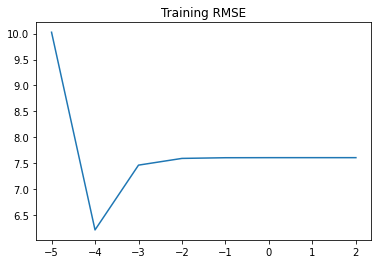

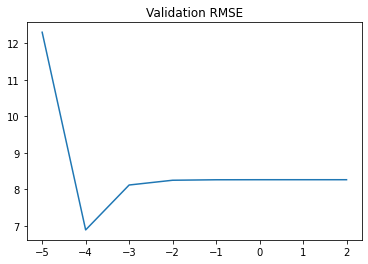


weights [ 0.07764086  0.07770006  0.07633522  0.07616582  0.07772207  0.07772348
  0.07781642  0.07550859  0.07800052  0.07800081  0.07800245  0.07800381
  0.07796442  0.07797334  0.07798954  0.07798932  0.07742308  0.07601694
  0.07194368  0.07788894 -0.00221363  0.07799854  0.09997991]

validation rmse= 6.890622245625653

NRMSE loss= 1.8029191839921204


In [82]:

#Plotting different metrics
plt.plot(np.log10(1/lamda),train_rmse);plt.title("Training RMSE");plt.show()
plt.plot(np.log10(1/lamda),validation_rmse);plt.title("Validation RMSE");plt.show()
print("\nweights",ans1[np.argmin(ans1[:,3])][0])
print("\nvalidation rmse=",np.sqrt(MSE_Loss(X_val,t_val,ans1[np.argmin(ans1[:,3])][0])))
print("\nNRMSE loss=",ans1[np.argmin(ans1[:,3])][3])


### **Best lamda simulation**-After simulating for small number of iterations we get approximate lamda which gives us least validation rmse,then we increase the number of iterations to update weights more accurately.This done to reduce the time complexity of overall process.


In [83]:
best1=Gradient_Descent (X, X_val, t, t_val, w, 10000, 100000, 1e-10, 1e-8, L2_Loss,L2_Gradient)

In [84]:
print("weights=",best1[0])
print("\nvalidation rmse=",best1[3]*np.std(t_val))
print("\nvalidation Nrmse=",best1[3])

weights= [ 4.06968990e-05  2.97275942e-05  3.85857137e-05  9.97871784e-05
  4.22289618e-05  3.07351464e-05  5.67662822e-06  9.07371318e-05
 -8.24048050e-08 -5.10192679e-08 -1.21103201e-07 -1.14082232e-07
 -1.71825819e-07 -6.79579044e-07 -3.28697972e-07 -7.15283116e-07
  4.54526586e-05  1.53789059e-04  3.76637694e-05  9.89460524e-07
  5.34130878e-03  1.21098356e-06  1.02153955e-01]

validation rmse= 5.530042133613005

validation Nrmse= 1.4469257921234848


# **MSE lamda(L1)**

In [85]:
result=[]
#Lamda values for regularization
lamda=np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000])
for l in lamda:
  result.append(Gradient_Descent (X, X_val, t, t_val, w, l, 1000, 1e-10, 1e-8, L1_Loss,L1_Gradient))
  #return w, train_loss_final, validation_loss_final, validation_NRMSE


In [86]:
ans1=np.array(result)
train_rmse=[];validation_rmse=[]
#Training and validation rmse calculations
for i in range(len(result)):
  train_rmse.append(np.sqrt(MSE_Loss(X,t,ans1[i][0])))
  validation_rmse.append(np.sqrt(MSE_Loss(X_val,t_val,ans1[i][0])))




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


# **First approximately plot the lamda vs rmse error then increase iterations to find the weights more accurately**

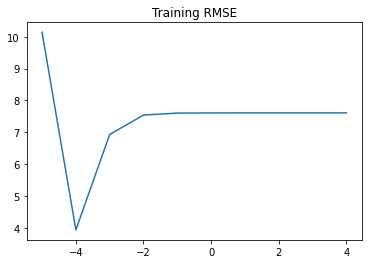

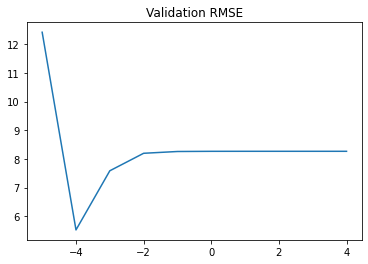


weights [ 9.65450830e-05 -6.62695091e-05  8.42475843e-05  3.63938333e-05
 -3.92061965e-05 -4.90339322e-05  2.24987810e-05 -6.33540379e-05
 -1.45991637e-05 -1.39715209e-05 -1.26359712e-05 -1.15274927e-05
 -4.16500813e-05 -3.80012247e-05 -2.15092417e-05 -2.57243118e-05
  8.70677044e-05  6.69286769e-05  5.48900959e-05 -8.77081882e-05
  5.34960262e-03 -1.36475093e-05  9.99863525e-02]

validation rmse= 5.523115744985103

NRMSE loss= 1.4451135147285141


In [87]:

#Plotting different metrics
plt.plot(np.log10(1/lamda),train_rmse);plt.title("Training RMSE");plt.show()
plt.plot(np.log10(1/lamda),validation_rmse);plt.title("Validation RMSE");plt.show()
print("\nweights",ans1[np.argmin(ans1[:,3])][0])
print("\nvalidation rmse=",np.sqrt(MSE_Loss(X_val,t_val,ans1[np.argmin(ans1[:,3])][0])))
print("\nNRMSE loss=",ans1[np.argmin(ans1[:,3])][3])

### **Best lamda simulation**-After simulating for small number of iterations we get approximate lamda which gives us least validation rmse,then we increase the number of iterations to update weights more accurately.This done to reduce the time complexity of overall process.


In [88]:
best2=Gradient_Descent (X, X_val, t, t_val, w, 1000, 100000, 1e-10, 1e-8, L1_Loss,L1_Gradient)


In [89]:
print("weights=",best2[0])
print("\nvalidation rmse=",best2[3]*np.std(t_val))
print("\nvalidation Nrmse=",best2[3])

weights= [ 8.07430500e-06 -6.90683237e-06  2.48844704e-06 -1.14532090e-06
 -9.41827346e-06 -4.66041868e-06 -6.35775899e-06 -2.30858382e-06
 -1.55070314e-06 -4.99119436e-06 -2.24448499e-06 -4.67772609e-07
  4.94305801e-06  2.05226686e-06  5.79212811e-06  4.22135509e-06
  6.89024761e-06 -9.14454826e-06  1.93064589e-06 -6.00573277e-06
  5.50427143e-03  3.20906121e-06  1.00543209e-01]

validation rmse= 5.075682462015529

validation Nrmse= 1.3280433836624084


# **Pseudo Inverse**

In [90]:
def Pseudo_Inverse_part2 (X, t, lamda): # Output should be weight vector
    r=len(X)
    X_new=np.c_[ X, np.ones(r)];
    I=np.identity(len(X_new[0]))
    X_t=np.transpose(X_new);
    w=np.dot(np.dot(np.linalg.inv((np.dot(X_t,X_new)+lamda*I)),X_t),t);
    return w
    raise NotImplementedError()

In [91]:
result=[]
lamda=np.array([i for i in range(1,50000)])

for l in lamda:
  w=Pseudo_Inverse_part2(X,t,l)
  trmse=np.sqrt(MSE_Loss(X,t,w))
  vrmse=np.sqrt(MSE_Loss(X_val,t_val,w))
  nrmse=NRMSE_Metric(X_val,t_val,w)
  result.append([w,trmse,vrmse,nrmse])
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


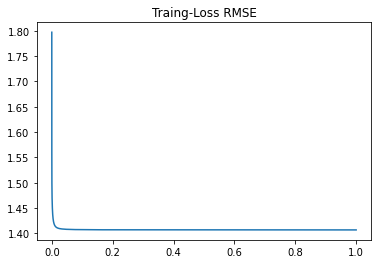

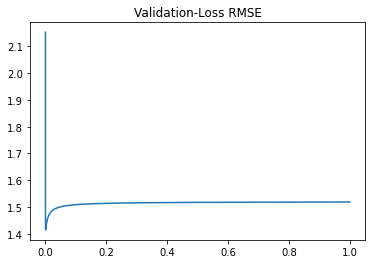

weights [ 1.48887983e-01  2.75407058e-02  1.56282564e-03 -1.70200103e-02
  6.33881626e-01  1.06637968e-01 -1.53906256e-01  1.09316825e-02
 -2.07858560e-01 -1.57702060e-01 -1.74933482e-01 -2.10482812e-01
 -8.91172832e-02  8.41828238e-02 -6.37932862e-02 -5.42474603e-02
  1.20256413e-02  4.04646348e-02 -2.77466394e-03  1.66482576e-01
  7.12612895e-05  6.68904410e-04  6.68904410e-04]

validation rmse= 1.4146023058482535

NRMSE loss= 0.3701282038138681


In [92]:
ans3=np.array(result)

plt.plot(1/lamda,ans3[:,1]);plt.title("Traing-Loss RMSE");plt.show()
plt.plot(1/lamda,ans3[:,2]);plt.title("Validation-Loss RMSE");plt.show()

print("weights",ans3[np.argmin(ans3[:,3])][0])
print("\nvalidation rmse=",ans3[np.argmin(ans3[:,3])][2])
print("\nNRMSE loss=",ans3[np.argmin(ans3[:,3])][3])

In [93]:
best3=ans3[np.argmin(ans3[:,3])]
print(Prediction(X_val,best3[0]),w,np.argmin(ans3[:,3]))

[30.51229273 29.19426047 29.43658189 ... 21.48375766 21.63362343
 21.55457653] [ 0.13102907  0.08027594 -0.06085868  0.0021723   0.20690823  0.13246654
 -0.05587505  0.01101492 -0.01138592 -0.0084053  -0.00982057 -0.01076474
 -0.0226349   0.00429721 -0.01177573 -0.02258184  0.03398891  0.11527601
 -0.00284335  0.01507568  0.00043713  0.00091399  0.00091399] 1417


# **Predicted vs Actual value plot & R2 score for best model**

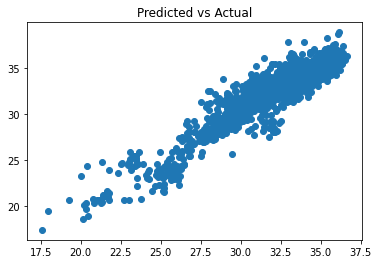

R2-score= 0.8630051127415197


In [99]:
#Plotting for best model ie PseudoInverse
plt.scatter(Prediction(X_val,best3[0]),t_val);plt.title("Predicted vs Actual")
plt.show()
print("R2-score=",r2score(t_val,Prediction(X_val,best3[0])))

# **Test Prediction** 

In [101]:
#Preparing Test dataframe & saving predicted output
url="https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv "
test_df=pd.read_csv(url)
#X_test=Normalize(np.asarray(test_df));display(test_df)
X_test=np.asarray(test_df);display(test_df)
X_test=np.c_[ X_test, np.ones(len(X_test))]
w=best3[0];print(w)

T=Prediction(X_test,w);print(T,np.mean(T),np.std(T),best3[0])
DF = pd.DataFrame(T)
#DF.to_csv("19D070048_1.csv")



,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,27.9,19.9,58.964123,97.821373,26.798375,20.828714,6.397833,75.366664,0.197580,0.306510,4.236132e-01,0.842868,0.0,0.0,0.0,0.025890,37.6046,126.991,212.3350,2.7850,5992.895996
1,30.3,21.0,51.617828,89.577393,29.069652,22.979956,6.199736,54.449329,0.193229,0.311707,4.317073e-01,0.816846,0.0,0.0,0.0,0.031924,37.6046,127.032,44.7624,0.5141,5869.312500
2,30.2,22.5,47.538521,85.529457,29.696974,23.554281,6.269956,14.450297,0.200518,0.301901,4.105748e-01,0.825653,0.0,0.0,0.0,0.011254,37.5776,127.058,33.3068,0.2661,5863.555664
3,30.7,22.0,59.407711,98.806969,28.234872,21.380987,6.755825,105.226457,0.186295,0.302106,3.978184e-01,0.781959,0.0,0.0,0.0,0.041682,37.6450,127.022,45.7160,2.5348,5856.964844
4,31.0,21.8,55.004128,92.867073,27.988202,22.164184,6.241006,104.791246,0.173245,0.291852,4.479975e-01,0.823050,0.0,0.0,0.0,0.014004,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.000000,37.5507,127.040,26.2980,0.5721,4456.024414
1502,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.000000,37.5102,127.086,21.9668,0.1332,4441.803711
1503,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,37.5372,126.891,15.5876,0.1554,4443.313965
1504,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,37.5237,126.909,17.2956,0.2223,4438.373535


[ 1.48887983e-01  2.75407058e-02  1.56282564e-03 -1.70200103e-02
  6.33881626e-01  1.06637968e-01 -1.53906256e-01  1.09316825e-02
 -2.07858560e-01 -1.57702060e-01 -1.74933482e-01 -2.10482812e-01
 -8.91172832e-02  8.41828238e-02 -6.37932862e-02 -5.42474603e-02
  1.20256413e-02  4.04646348e-02 -2.77466394e-03  1.66482576e-01
  7.12612895e-05  6.68904410e-04  6.68904410e-04]
[27.72804686 29.79901956 29.89260183 ... 27.054704   27.18092416
 27.19629345] 30.274610354281656 2.8601083240257545 [ 1.48887983e-01  2.75407058e-02  1.56282564e-03 -1.70200103e-02
  6.33881626e-01  1.06637968e-01 -1.53906256e-01  1.09316825e-02
 -2.07858560e-01 -1.57702060e-01 -1.74933482e-01 -2.10482812e-01
 -8.91172832e-02  8.41828238e-02 -6.37932862e-02 -5.42474603e-02
  1.20256413e-02  4.04646348e-02 -2.77466394e-03  1.66482576e-01
  7.12612895e-05  6.68904410e-04  6.68904410e-04]


# **Observation & Conclusion**
i)MSE+L2_Loss /MSE+L1_Loss(With Normalization)-


> 



1.   As 1/λ increases Training Rmse  decreases.
2.   The approximate λ=1000 for which validation rmse is minimum.
3.   The graph of validation rmse is convex curve.





ii)Pseudo Inverse(With Normalization)


> Indented block

1.   As 1/λ increases Training Rmse  decreases.
2.   The approximate λ=16812 for which validation rmse is minimum.
3.   As λ increases(beyond 50000) the weights start becoming ≈0 ,The targets predicted ≈0 hence validation rmse saturates at ≈30.To find the λ that reduces error we iterate over the convex part of the curve ie (λ =10000,50000) & we get rmse=4.5.

Test Prediction-
(With Normalization)

1.   MSE+L2: λ=1000,max_iteration=100000,mean of test target predicted=26.06,std_deviation=0.009,training validation rmse= 21.973113561377335,training validation Nrmse= 5.749226493586081


2.  MSE+L1:λ=1000,max_iteration=100000,mean of test target predicted=26.67,std_deviation=0.024,training validation rmse= 5.371868964734046,training NRMSE loss= 1.4055400608499795

3. Pseudo Inverse:λ=16812,mean of test target=10.99,std_deviation=1.34.training validation rmse= 4.508485693244155,training NRMSE loss= 1.179637347304018


With Normalization the Pseudoinverse method fails badly as mean,std_deviation of test is different from training .Similarly for L2,L1 regularization the variance is very less hence the output is skewed.

Test Prediction-
(Without Normalization)
1.   MSE+L2: λ=10000,max_iteration=100000,mean of test target predicted=28.70,std_deviation=2.264,training validation rmse= 5.53,training  Nrmse loss= 1.44


2.  MSE+L1:λ=10000,max_iteration=100000,mean of test target predicted=29.52,std_deviation=2.33,training validation rmse= 5.07,training NRMSE loss= 1.32

3. Pseudo Inverse:λ=1417,mean of test target=,std_deviation=.training validation rmse= 1.414,training NRMSE loss= 0.37

**PseudoInverse is the best in terms of nrmse loss.**

#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): 
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 